<a href="https://colab.research.google.com/github/kshuravi/Digimon_Challenge_Khalida/blob/main/Digimon_Challenge_Khalida.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Introduction

I was sent a kaggle link of Digimon Database by a company as a technical test to explore this analysis for 3 hours. It took me a while to study the datasets and come up with a simpler approach given the amount of time. I have made my analysis very specific so that it is easier for readers to understand my approach. I have done this project in Google Colab Notebook and attached a repository in my Github so everyone can see this project.

##The Goal!

To understand the content and to answer the questions provided in the Inspriration.

##Import necessary libraries and extract the zip files

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"kshuravi","key":"c5b8516c7c0691ddf59fc4765d40f732"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d rtatman/digidb

digidb.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
from zipfile import ZipFile
file_name1 = "digidb.zip"
with ZipFile(file_name1,'r') as zipfile:
  zipfile.extractall()
  print('Done')

Done


##Loading the Datasets

In [ ]:
DigiDB_digimonlist = pd.read_csv('DigiDB_digimonlist.csv')
DigiDB_digimonlist.head()

,Number,Digimon,Stage,Type,Attribute,Memory,Equip Slots,Lv 50 HP,Lv50 SP,Lv50 Atk,Lv50 Def,Lv50 Int,Lv50 Spd
0,1,Kuramon,Baby,Free,Neutral,2,0,590,77,79,69,68,95
1,2,Pabumon,Baby,Free,Neutral,2,0,950,62,76,76,69,68
2,3,Punimon,Baby,Free,Neutral,2,0,870,50,97,87,50,75
3,4,Botamon,Baby,Free,Neutral,2,0,690,68,77,95,76,61
4,5,Poyomon,Baby,Free,Neutral,2,0,540,98,54,59,95,86


In [ ]:
DigiDB_movelist = pd.read_csv('DigiDB_movelist.csv')
DigiDB_movelist.head()

,Move,SP Cost,Type,Power,Attribute,Inheritable,Description
0,Wolkenapalm I,3,Physical,65,Fire,Yes,"Physical attack, 65 Fire damage to one foe. 95..."
1,Wolkenapalm II,6,Physical,85,Fire,Yes,"Physical attack, 85 Fire damage to one foe. 95..."
2,Wolkenapalm III,9,Physical,105,Fire,Yes,"Physical attack, 105 Fire damage to one foe. 9..."
3,Burst Flame I,3,Magic,55,Fire,Yes,"Magic attack, 55 Fire damage to one foe. 95% a..."
4,Burst Flame II,6,Magic,75,Fire,Yes,"Magic attack, 75 Fire damage to one foe. 95% a..."


In [ ]:
DigiDB_supportlist = pd.read_csv('DigiDB_supportlist.csv')
DigiDB_supportlist.head()

,Name,Description
0,Adroit Wisdom,Increases INT by 15%.
1,All-Rounder,"Increases ATK, DEF, INT and SPD by 5%."
2,Analyze,Increases scan values by 10%.
3,Animal Colosseum,Increases damage from Earth skills by 15%.
4,Aus Generics,Increases SPD and EVA by 25% when HP drops bel...


##Which set of moves will get the best ratio of attack power to SP spent?

In [ ]:
# Finding the highest ratio of Power to SP and showing that particular row
DigiDB_movelist['Power_to_SP_ratio'] = DigiDB_movelist['Power']/DigiDB_movelist['SP Cost']
DigiDB_movelist.sort_values(by="Power_to_SP_ratio", ascending=False).head(1)

,Move,SP Cost,Type,Power,Attribute,Inheritable,Description,Power_to_SP_ratio
80,Heavy Strike I,3,Physical,70,Neutral,Yes,"Physical attack, 70 Neutral damage to one foe....",23.333333


##Which team of 3 digimon have the highest attack? Defense?

In [ ]:
# 3 digimon having the highest attack
DigiDB_digimonlist[["Digimon", "Lv50 Atk"]].sort_values(by="Lv50 Atk", ascending=False).head(3)

,Digimon,Lv50 Atk
243,Chaosmon,318
235,Belphemon RM,247
195,Diaboromon,243


In [ ]:
# 3 digimon having the highest defence
DigiDB_digimonlist[["Digimon", "Lv50 Def"]].sort_values(by="Lv50 Def", ascending=False).head(3)

,Digimon,Lv50 Def
181,GroundLocomon,213
182,Craniamon,208
238,Magnamon,208


##What’s the tradeoff between HP and SP?

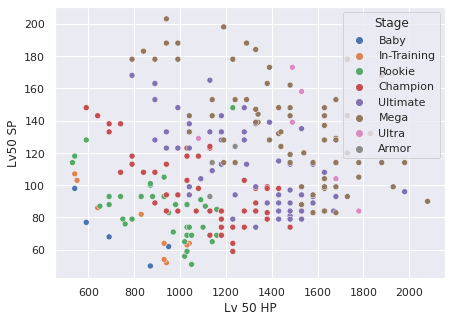

In [ ]:
plt.figure(figsize=(7,5))
sns.scatterplot(data = DigiDB_digimonlist, x="Lv 50 HP", y="Lv50 SP", hue="Stage")
plt.show()

Both the HP and SP increase when the Stage increases

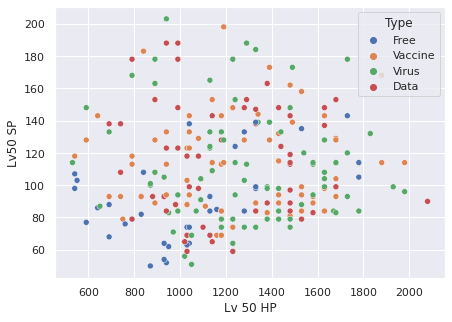

In [ ]:
plt.figure(figsize=(7,5))
sns.scatterplot(data = DigiDB_digimonlist, x="Lv 50 HP", y="Lv50 SP", hue="Type")
plt.show()

There seems to be a variety of values for HP and SP in the Virus Type and the lowest variety for Free Type

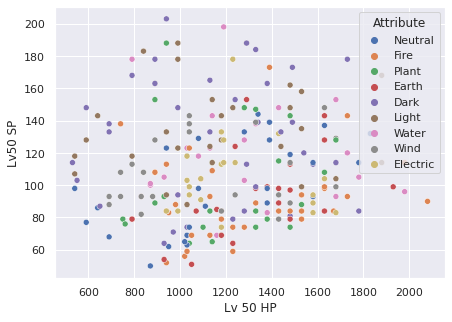

In [ ]:
plt.figure(figsize=(7,5))
sns.scatterplot(data = DigiDB_digimonlist, x="Lv 50 HP", y="Lv50 SP", hue="Attribute")
plt.show()

No relationship between HP and SP found in terms of Attributes

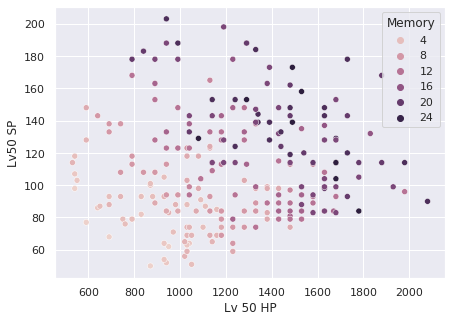

In [ ]:
plt.figure(figsize=(7,5))
sns.scatterplot(data = DigiDB_digimonlist, x="Lv 50 HP", y="Lv50 SP", hue="Memory")
plt.show()

Clearly, When the value of Memory increases, the HP and SP increase gradually.

##Are some types over- or under-represented?

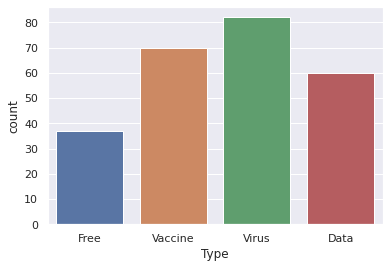

In [ ]:
sns.countplot(x=DigiDB_digimonlist['Type'])
plt.show()

The above plot shows that the Virus-type Digimon is over-represented and the Free-type Digimon is under-represented.

##Both the moves and support skills have short text descriptions. Can an NLP analysis reveal underlying clusters of moves?

A combination of bags of texts always increase the chance of having a good NLP analysis. I think that a TF-IDF analysis by using CountVectorizor & Cosine Similarity could work with short text descriptions to proceed for a nice recommendation system approach.

##Are different types and attributes evenly represented across stages?

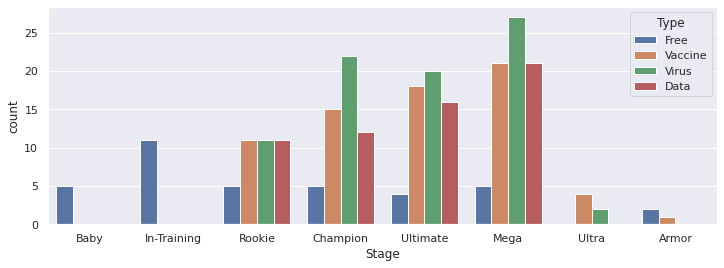

In [ ]:
plt.figure(figsize=(12,4))
sns.countplot(hue=DigiDB_digimonlist['Type'], x=DigiDB_digimonlist['Stage'])
plt.show()

Types are not evenly represented across Stages as seen in the above plot. As they reach higher Stages the Type tends to become Virus.

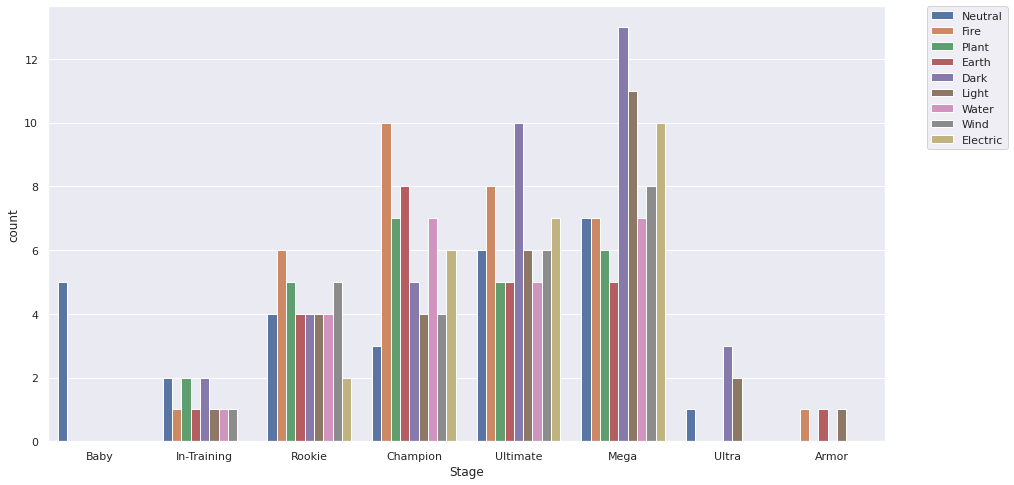

In [ ]:
plt.figure(figsize=(15,8))
sns.countplot(hue=DigiDB_digimonlist['Attribute'], x=DigiDB_digimonlist['Stage'])
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

Here, the Types are also not evenly represented across Attributes as seen in the above plot. The Ultimate and Mega Stages have highest Dark Type while the Rookie and Champion Stages have highest Fire Type.

##Conclusion

I really enjoyed taking this technical challenge. In a very short amount of time, I have learned a lot about the Digimon Database. However, as I have limited my time to 3 hours for this project, I was not able to show the alternative approaches I would take for in-depth analysis.